# House Sales in King County, USA - TensorFlow Regression - Kaggle

## Reading in the data

I will be making use of the data found in the following Kaggle dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Importing the libraries that I will be making use of:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since I am using Jupyter Notebook and I would like to see plots displayed directly below the code cells that produce them, I must use the following:

In [39]:
%matplotlib inline

<br>

In [40]:
df = pd.read_csv('kc_house_data.csv')

The data contains information on over 21,000 houses sold in the King County area between May 2014 and May 2015. I will split this data into a training set and a test set. The training set will be used to train a neural network and the test set will be used to test this neural network. I will be predicting a price for each house in the test set and comparing it to the actual value in order to evaluate my model.

In [41]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Descriptions for the columns can be seen below:

## Feature Columns

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an 
average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data visualisation

### This section is just to explore the data and gain some preliminary insight. You can skip to the feature engineering section if you don't want to view this.


In [42]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There appear to be no null values which means we won't have to do any cleaning. We will do some feature engineering later on.

Let's look at the correlation between the 'price' column and other columns:

In [43]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

As you would expect, square footage of the house, grade and number of bathrooms and bedroom have some correlation with the price of the house.

C:\Users\Pritesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

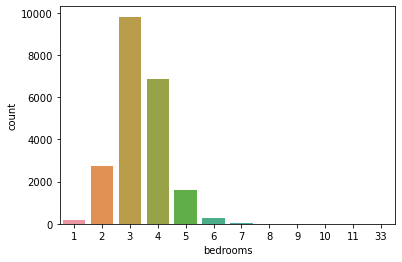

In [44]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

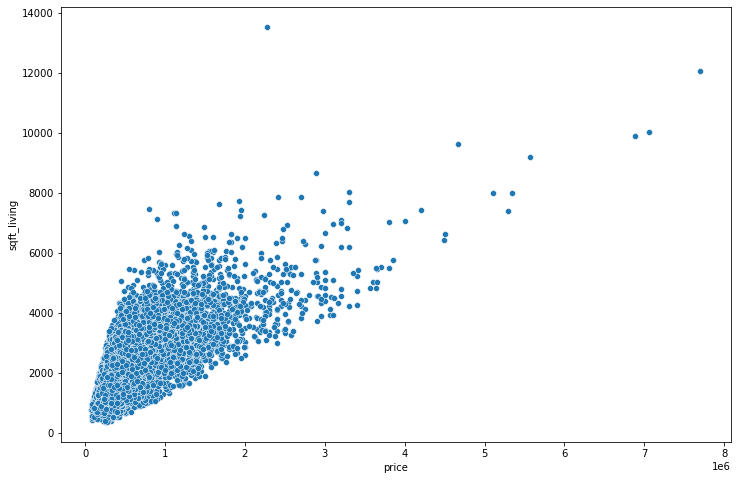

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

The above figure shows a very strong linear relationship between sqft_living and price.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

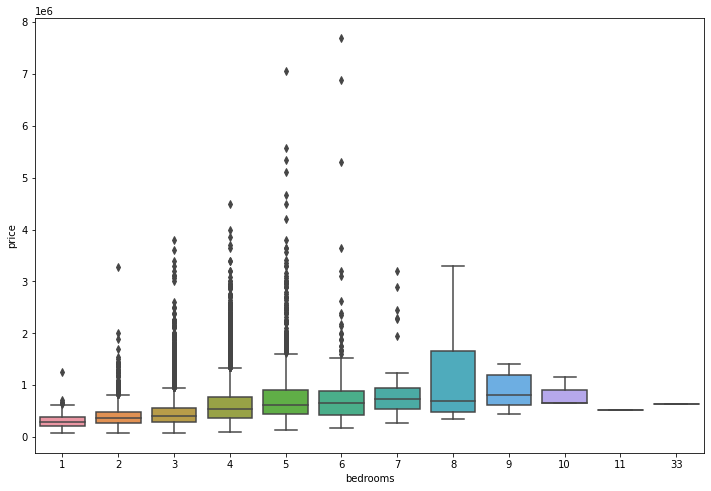

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

The above plot shows the distribution of prices of houses per number of bedrooms. We know from earlier that most of the houses have between 3 and 7 bedrooms so it makes sense that the prices have a large variety for these.

Let's take a look at the distribution of house prices.

<AxesSubplot:xlabel='price', ylabel='Count'>

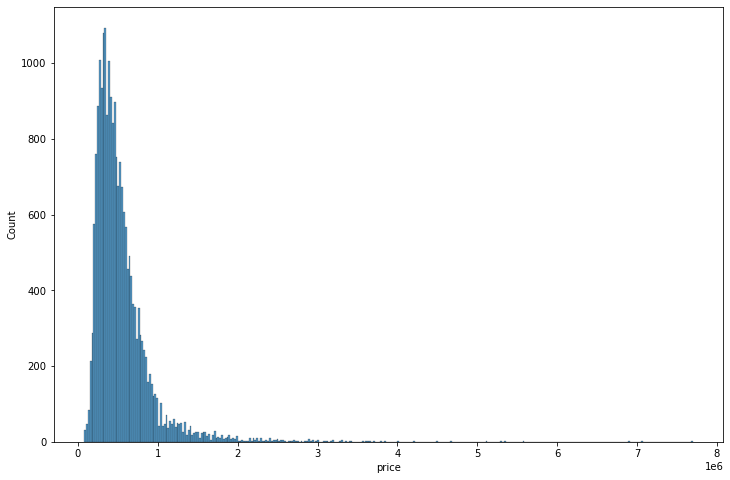

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

Most of the houses fall between \\$0 and \\$1.5million. There do appear to be some (albeit very few) houses that are priced higher than $4 million.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

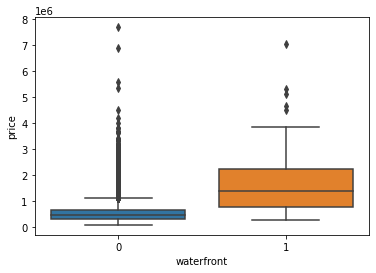

In [48]:
sns.boxplot(x='waterfront',y='price',data=df)

Houses on the waterfront are more likely to be more expensive than those that aren't.

## Feature engineering